In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler,scale
from sklearn import linear_model,cross_validation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold,train_test_split,cross_validate
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\Taoufik\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Load data
final_data_partitionned=pd.read_csv('partitionned_train_final.csv',index_col='API').iloc[:,2:]
########################
#Variables and lines of GROUP1
trainG1=pd.read_csv('Train_G1.csv',sep=';',index_col='API')
indexG1=trainG1.index
columnsG1=np.append(np.array(trainG1.columns),'group')
#Variables and lines of GROUP2
trainG2=pd.read_csv('Train_G2.csv',sep=';',index_col='API')
indexG2=trainG2.index
columnsG2=np.append(np.array(trainG2.columns),'group')
#######################
#Final dataframes for the two groups
traing1=final_data_partitionned.loc[indexG1,columnsG1]
traing2=final_data_partitionned.loc[:,columnsG2]

In [3]:
#just checking that there's no missing data missing...
traing1.isnull().sum().max(),traing2.isnull().sum().max()

(0, 0)

In [4]:
traing1.drop('OilCum360',axis=1,inplace=True)
traing2.drop('OilCum360',axis=1,inplace=True)

### Splitting to groups

#### Group1

In [5]:
traing1.group.unique()

array([2, 0, 1], dtype=int64)

In [6]:
traing1_0=traing1[traing1.group==0]
traing1_1=traing1[traing1.group==1]
traing1_2=traing1[traing1.group==2]

In [7]:
len(traing1_0),len(traing1_1),len(traing1_2)

(85, 116, 161)

In [8]:
traing1_0.drop('group',axis=1,inplace=True)
traing1_1.drop('group',axis=1,inplace=True)
traing1_2.drop('group',axis=1,inplace=True)

In [9]:
X_train0, X_test0, y_train0, y_test0= train_test_split(traing1_0.iloc[:,1:].drop('GasCum360',axis=1), traing1_0.GasCum360, test_size=0.3, random_state=0)
X_train1, X_test1 ,y_train1, y_test1= train_test_split(traing1_1.iloc[:,1:].drop('GasCum360',axis=1), traing1_1.GasCum360, test_size=0.3, random_state=0)
X_train2 ,X_test2, y_train2 ,y_test2= train_test_split(traing1_2.iloc[:,1:].drop('GasCum360',axis=1), traing1_2.GasCum360, test_size=0.3, random_state=0)

In [10]:
lmG1_0=linear_model.LinearRegression()
lmG1_1=linear_model.LinearRegression()
lmG1_2=linear_model.LinearRegression()

In [11]:
#API is an identifier of the well so we'll not include it into features
lmG1_0.fit(X_train0,y_train0)
lmG1_1.fit(X_train1,y_train1)
lmG1_2.fit(X_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

**Evaluation on training**

In [12]:
# Explained variance score: 1 is perfect prediction
print("Mean squared error for partition 0: %.2f"% mean_squared_error(y_train0,lmG1_0.predict(X_train0)))
print('Variance score for partition 0: %.2f'% r2_score(y_train0,lmG1_0.predict(X_train0)))
print("-----------------------------------------------")
print("Mean squared error for partition 1: %.2f"% mean_squared_error(y_train1, lmG1_1.predict(X_train1)))
print('Variance score for partition 1: %.2f'% r2_score(y_train1, lmG1_1.predict(X_train1)))
print("-----------------------------------------------")
print("Mean squared error for partition 2: %.2f"% mean_squared_error(y_train2, lmG1_2.predict(X_train2)))
print('Variance score for partition 2: %.2f '% r2_score(y_train2, lmG1_2.predict(X_train2)))

Mean squared error for partition 0: 0.02
Variance score for partition 0: 0.89
-----------------------------------------------
Mean squared error for partition 1: 0.03
Variance score for partition 1: 0.87
-----------------------------------------------
Mean squared error for partition 2: 0.11
Variance score for partition 2: 0.87 


Text(0,0.5,'Predicted')

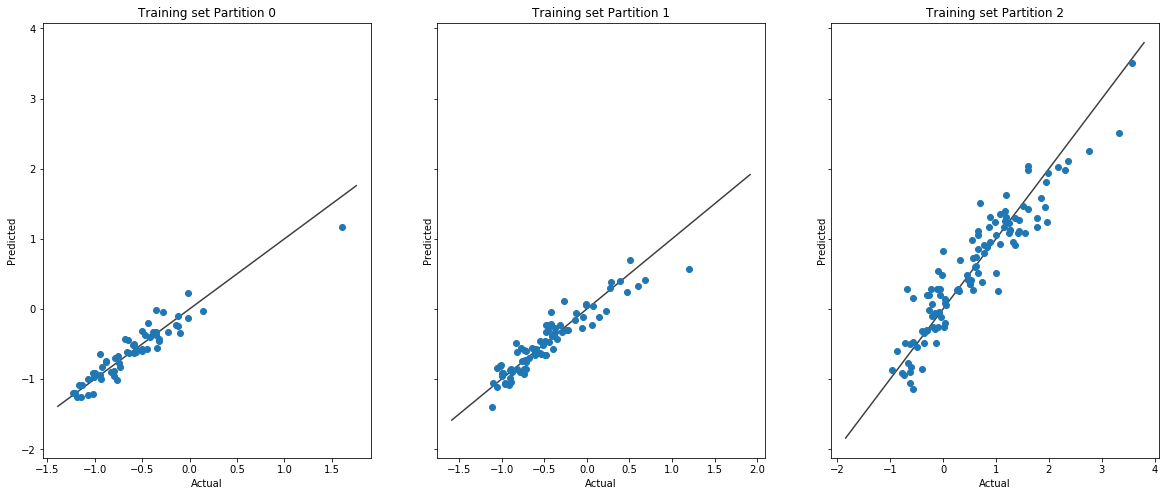

In [13]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.set_figheight(8)
f.set_figwidth(20)
ax1.scatter(y_train0,lmG1_0.predict(X_train0))
#
lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

#
ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax1.set_title('Training set Partition 0')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax2.scatter(y_train1, lmG1_1.predict(X_train1))
#
lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

#
ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax2.set_title('Training set Partition 1')
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax3.scatter(y_train2, lmG1_2.predict(X_train2))
#
lims = [
    np.min([ax3.get_xlim(), ax3.get_ylim()]),  # min of both axes
    np.max([ax3.get_xlim(), ax3.get_ylim()]),  # max of both axes
]

#
ax3.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax3.set_title('Training set Partition 2')
ax3.set_xlabel('Actual')
ax3.set_ylabel('Predicted')

In [14]:
y_pred0 = lmG1_0.predict(X_test0)
y_pred1 = lmG1_1.predict(X_test1)
y_pred2 = lmG1_2.predict(X_test2)

In [15]:
# Explained variance score: 1 is perfect prediction
print("Mean squared error for partition 0: %.2f"% mean_squared_error(y_test0, y_pred0))
print('Variance score for partition 0: %.2f'% r2_score(y_test0, y_pred0))
print("-----------------------------------------------")
print("Mean squared error for partition 1: %.2f"% mean_squared_error(y_test1, y_pred1))
print('Variance score for partition 1: %.2f'% r2_score(y_test1, y_pred1))
print("-----------------------------------------------")
print("Mean squared error for partition 2: %.2f"% mean_squared_error(y_test2, y_pred2))
print('Variance score for partition 2: %.2f '% r2_score(y_test2, y_pred2))

Mean squared error for partition 0: 1.22
Variance score for partition 0: -17.51
-----------------------------------------------
Mean squared error for partition 1: 0.07
Variance score for partition 1: 0.47
-----------------------------------------------
Mean squared error for partition 2: 0.38
Variance score for partition 2: 0.53 


Text(0,0.5,'Predicted')

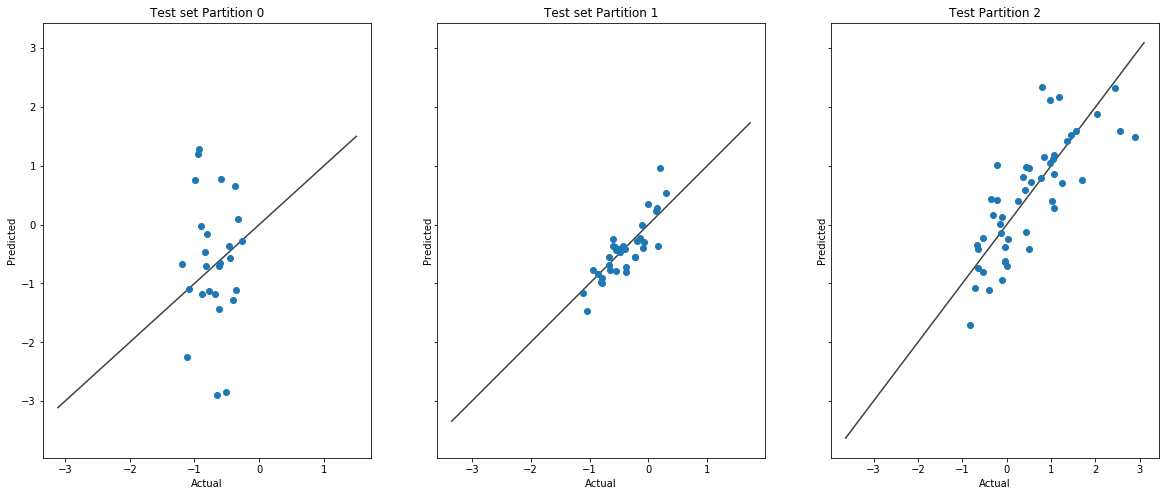

In [16]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True)
f.set_figheight(8)
f.set_figwidth(20)
ax1.scatter(y_test0,y_pred0)
#
lims = [
    np.min([ax1.get_xlim(), ax1.get_ylim()]),  # min of both axes
    np.max([ax1.get_xlim(), ax1.get_ylim()]),  # max of both axes
]

#
ax1.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax1.set_title('Test set Partition 0')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax2.scatter(y_test1,y_pred1)
#
lims = [
    np.min([ax2.get_xlim(), ax2.get_ylim()]),  # min of both axes
    np.max([ax2.get_xlim(), ax2.get_ylim()]),  # max of both axes
]

#
ax2.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax2.set_title('Test set Partition 1')
ax2.set_xlabel('Actual')
ax2.set_ylabel('Predicted')
ax3.scatter(y_test2,y_pred2)
#
lims = [
    np.min([ax3.get_xlim(), ax3.get_ylim()]),  # min of both axes
    np.max([ax3.get_xlim(), ax3.get_ylim()]),  # max of both axes
]

#
ax3.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax3.set_title('Test Partition 2')
ax3.set_xlabel('Actual')
ax3.set_ylabel('Predicted')

As we saw in oil models, we have the same pattern in this case of Gas model

In [17]:
#Index of the value
#y_test0.iloc[y_pred0.argmin()]

In [18]:
#xt=traing1_0[['API','GasCum360']]
#xt[xt.GasCum360==y_test0.iloc[y_pred0.argmin()]]

In [19]:
#traing1_0=traing1_0.drop(42)

In [20]:
#X_train0, X_test0, y_train0, y_test0= train_test_split(traing1_0.iloc[:,1:].drop('GasCum360',axis=1), traing1_0.GasCum360, test_size=0.3, random_state=0)
#lmG1_0=linear_model.LinearRegression()
#lmG1_0.fit(X_train0,y_train0)
#y_pred0 = lmG1_0.predict(X_test0)

In [21]:
# Explained variance score: 1 is perfect prediction
#print("Mean squared error for partition 0: %.2f"% mean_squared_error(y_test0, y_pred0))
#print('Variance score for partition 0: %.2f'% r2_score(y_test0, y_pred0))

In [22]:
#plt.scatter(y_test0,y_pred0)

    Scikit-learn is a good way to plot a linear regression but if we are considering linear regression for modelling purposes then we need to know the importance of variables( significance) with respect to the hypothesis.

    To do this, we need to calculate the p value for each variable and if it is less than the desired cutoff( 0.05 is the general cut off for 95% significance) then we can say with confidence that a variable is significant. We can calculate the p-value using another library called ‘statsmodels’.

In [23]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.regression.linear_model import RegressionResults

  **Prediction on partition 0 is not good**
  
 **we will try to improve the model using a feature selection. We will use OLS model to estimate unknown parameters in a linear model**

## PARTITION 0 OF GROUP1

In [24]:
model1_0=sm.OLS(y_train0,X_train0)
r1_0=model1_0.fit()
print(r1_0.summary())

                            OLS Regression Results                            
Dep. Variable:              GasCum360   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     9.461
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           4.35e-06
Time:                        17:20:04   Log-Likelihood:                 27.543
No. Observations:                  59   AIC:                             28.91
Df Residuals:                      17   BIC:                             116.2
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Surf_Y          

We can drop few variables and select only those that have p values < 0.5
   
       A general approach to compare two different models is AIC( Akaike Information Criteria) and the model with minimum AIC is the best one.

In [25]:
model1_0=sm.OLS(y_train0,X_train0[np.array(r1_0.pvalues[r1_0.pvalues<0.5].index)])
r1_0=model1_0.fit()
print(r1_0.summary())

                            OLS Regression Results                            
Dep. Variable:              GasCum360   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     11.48
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           1.60e-07
Time:                        17:20:04   Log-Likelihood:                 26.316
No. Observations:                  59   AIC:                             25.37
Df Residuals:                      20   BIC:                             106.4
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Surf_Y          

In [26]:
X_train0=X_train0[np.array(r1_0.pvalues[r1_0.pvalues<0.5].index)]

**Dealing with multicollinearity**

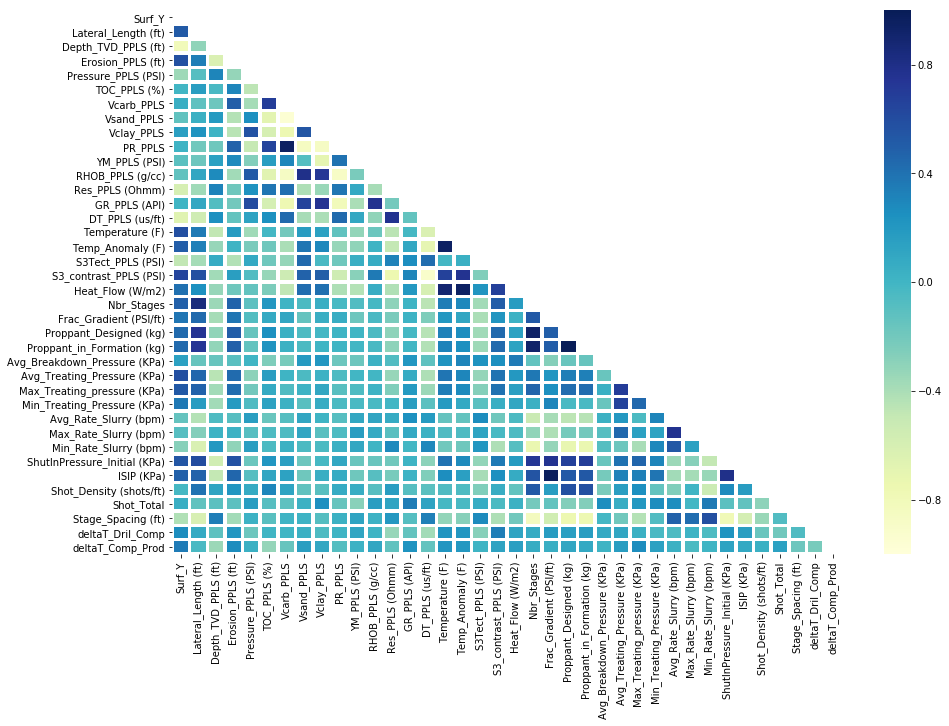

In [27]:
fig, ax = plt.subplots(figsize=(15,10)) 
corr_0=X_train0.corr(method='pearson')
mask=np.zeros_like(corr_0)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr_0,cmap='YlGnBu',vmax=1.0,vmin=-1.0,mask=mask,linewidths=2.5,ax=ax)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

Let's delete some variables : Surf_X ,PR_PPLS, Nbr_Stages, Proppant_Designed (kg)

In [28]:
X_t0=X_train0.drop(['PR_PPLS','Temp_Anomaly (F)','Nbr_Stages', 'Proppant_Designed (kg)'],axis=1)

In [29]:
model1_0=sm.OLS(y_train0,X_t0)
r1_0=model1_0.fit()
print(r1_0.summary())

                            OLS Regression Results                            
Dep. Variable:              GasCum360   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8.159
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           3.76e-07
Time:                        17:20:05   Log-Likelihood:                 6.8741
No. Observations:                  59   AIC:                             54.25
Df Residuals:                      25   BIC:                             124.9
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Surf_Y          

We can drop few variables and select only those that have p values < 0.5

In [30]:
model1_0=sm.OLS(y_train0,X_t0[np.array(r1_0.pvalues[r1_0.pvalues<0.5].index)])
r1_0=model1_0.fit()
print(r1_0.summary())

                            OLS Regression Results                            
Dep. Variable:              GasCum360   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     17.01
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           2.98e-13
Time:                        17:20:05   Log-Likelihood:                 4.3824
No. Observations:                  59   AIC:                             35.24
Df Residuals:                      37   BIC:                             80.94
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Surf_Y          

Let's analyse residuals

In [31]:
resids=r1_0.resid
print('var res: ' +str(np.var(resids)))# 
print(stats.kstest(resids/np.std(resids),'norm'))

var res: 0.05041423369461748
KstestResult(statistic=0.10881941227851299, pvalue=0.46059212985272202)


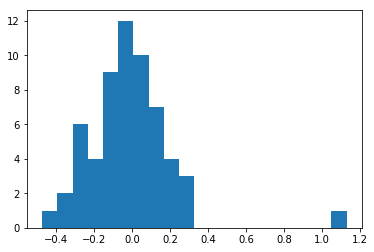

In [32]:
#Plot distribution of residuals:
plt.hist(resids,bins=20)
plt.show()

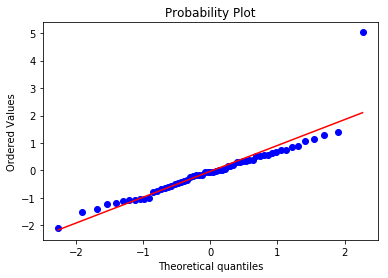

In [33]:
#QQplot of residuals
plt.figure()
stats.probplot(resids/np.std(resids), dist="norm",plot=plt)
plt.show()

In [34]:
X_t0=X_t0[np.array(r1_0.pvalues[r1_0.pvalues<0.5].index)]

#### Model improved 

In [35]:
lmG1_0=linear_model.LinearRegression()
lmG1_0.fit(X_t0,y_train0)
y_pred0 = lmG1_0.predict(X_test0[np.array(r1_0.pvalues[r1_0.pvalues<0.5].index)])

In [36]:
# Explained variance score: 1 is perfect prediction
print("Mean squared error for partition 0 (training): %.2f"% mean_squared_error(y_train0,lmG1_0.predict(X_t0)))
print('Variance score for partition 0 (training): %.2f'% r2_score(y_train0,lmG1_0.predict(X_t0)))

Mean squared error for partition 0 (training): 0.05
Variance score for partition 0 (training): 0.76


In [37]:
# Explained variance score: 1 is perfect prediction
print("Mean squared error for partition 0 (test): %.2f"% mean_squared_error(y_test0,y_pred0))
print('Variance score for partition 0 (test): %.2f'% r2_score(y_test0,y_pred0))

Mean squared error for partition 0 (test): 0.29
Variance score for partition 0 (test): -3.42


Text(0.5,1,'Partition 0 predicted vs actual')

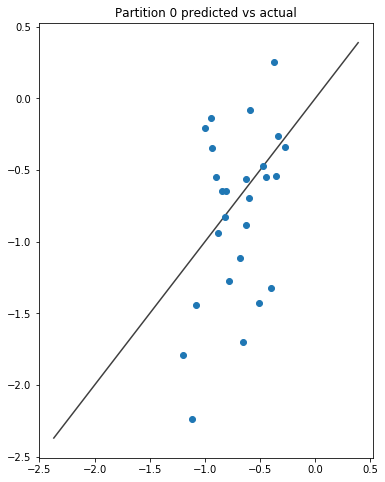

In [38]:
f, ax = plt.subplots()
f.set_figheight(8)
#f.set_figwidth(20)
ax.scatter(y_test0,y_pred0)
#
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

#
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_title('Partition 0 predicted vs actual')

Let's analyse residuals vs fitted

Text(0.5,0,'fitted')

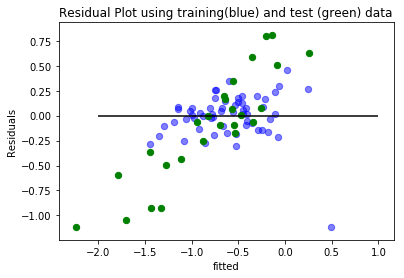

In [39]:
#Plotting residuals 
plt.scatter(lmG1_0.predict(X_t0),lmG1_0.predict(X_t0)-y_train0,c='b',s=40,alpha=0.5)
plt.scatter(y_pred0,y_pred0-y_test0,c='g',s=40)
plt.hlines(y=0,xmin=-2,xmax=1)
plt.title('Residual Plot using training(blue) and test (green) data')
plt.ylabel('Residuals')
plt.xlabel('fitted')

The model still not satisfying because the residuals against fitted shows a pattern

#### ##################################################l
#### We will use splitting by variable to improve our model

In [40]:
%matplotlib inline
import pylab 
from scipy.stats.stats import pearsonr   as corr
import numpy as np
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import sklearn.feature_selection as sel
from matplotlib import cm as c
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
from numpy.linalg import norm
from sklearn.neighbors import NearestNeighbors as NN
from scipy import stats

In [41]:
def model(d,gas=True,AL=0.05):
    ind=list(d.columns)
    
    if 'Zone' in ind:
        ind.remove('Zone')
    d=d.loc[:,ind]
    x=d.loc[:,ind]
    ######################### 
    x=np.array(x)
    if(gas):
        yg=x[:,-1]# gas prediction
    else:
        yg=x[:,-1]# pil prediction
  
    ## cut off target   
    a=x[:,:-1]
     # normalize the data  
    scaler = StandardScaler()
    X=np.array(scaler.fit_transform(a))
     
    pca = PCA()
    pca.fit(X)
    xx=pca.transform(X)
    selector = sel.VarianceThreshold(threshold=0.05) # features with variances lower than this  will be removed# normal value_0.5
    xx=selector.fit_transform(xx)
    
    p_vals=sel.f_regression(xx,yg)[1]
    F=sel.f_regression(xx,yg)[0]
    
   
    for i in range(len(p_vals)):## not important
        if np.isnan(p_vals[i]):
            p_vals[i]=2# secure handilng for n small
       
    sign_features_ind=[]
    sign_features_ind=[i for i in range(len(p_vals)) if p_vals[i] < AL] # indices of the significant features
    xx2=xx[:,sign_features_ind]### use only significant features for linear model
    XX=sm.add_constant(xx2)
    model=sm.OLS(yg,XX)
    result=model.fit()
    resids=result.resid
    params=result.params

    ############################# histograms and other plots
    f, axarr = plt.subplots(ncols=1,nrows=2,sharex=True)
    
    normd=np.random.normal(0,np.std(resids),len(d))
  
    bin=[i/4 for i in range(-5,12)]
    axarr[0].hist(resids)
    axarr[0].set_title('Resisuals')
    axarr[1].hist(normd)
    axarr[1].set_title('normal Sample of same size')
    
    pred=np.dot(XX,params)
    plt.figure() 
    plt.scatter(pred,resids)# 
    
    plt.title('residuals vs fitted')
    plt.xlabel('fitted')
    plt.figure()
    plt.scatter(yg,resids)#
    plt.title('residuals vs target')
    print(result.summary())
    print('var: ' +str(np.var(yg)))# 
    print('var res: ' +str(np.var(resids)))# 
    print(stats.kstest(resids/np.std(resids),'norm')) 
    plt.figure()
    plt.ylim(-2.5,2.5)
    stats.probplot(resids/np.std(resids), dist="norm",plot=plt,fit=False)
    hline=[i/10 for i in range(-20,20)]
    plt.plot(hline,hline,color='black')
   
    

In [42]:
def lm(d,gas=True,AL=0.05):
    ind=list(d.columns)
    if 'Zone' in ind:
        ind.remove('Zone')
    d=d.loc[:,ind]
    x=d.loc[:,ind]
    #########################
    x=np.array(x) 
    if(gas):
        yg=x[:,-1]# gas prediction
    else:
        yg=x[:,-1]# pil prediction
    ## cut off target   
    a=x[:,:-1]
     # normalize the data  
    scaler = StandardScaler()
    X=np.array(scaler.fit_transform(a))
     
    pca = PCA()
    pca.fit(X)
    xx=pca.transform(X)
    selector = sel.VarianceThreshold(threshold=0.05) # features with variances lower than this  will be removed# normal value_0.5
    xx=selector.fit_transform(xx)
    
    p_vals=sel.f_regression(xx,yg)[1]
    F=sel.f_regression(xx,yg)[0]
    
   
    for i in range(len(p_vals)):## not important
        if np.isnan(p_vals[i]):
            p_vals[i]=2# secure handling for n small
       
    sign_features_ind=[]
    sign_features_ind=[i for i in range(len(p_vals)) if p_vals[i] < AL] # indices of the significant features
    xx2=xx[:,sign_features_ind]### use only significant features for linear model
    XX=sm.add_constant(xx2)
    model=sm.OLS(yg,XX)
    result=model.fit()
    resids=result.resid
    res_var=np.var(resids)
    return [result,res_var]

    
   
    

In [43]:
def find_split(d,gaz=True,step=10,attr=[]):# 
    mses=[]
    features=[]
    breakpoints=[]
    thresholds=[]
    if(len(attr)==0):
        attr=list(d.columns)
        attr.remove('GasCum360')
    
    minv=20# minimum variance of the best split
    min_ind="bla"#index at wihch position the best split is made
    n=0# optimal index for the feature currently in the for loop
    var=20
    l=len(d)
    print()
    if(gaz):
        target='GasCum360'
    else:
        target='OilCum360'
    v=np.var(d[target])
    print('target variance: '+str(v))
    print('--------------------------------')
    for indexx in attr:
        features.append(indexx)
        d=d.sort_values(indexx)
        in_var=20 # min var of current loop
        in_n=0#  best index of current loop
        for i in range(10,l-10,step):
            d1=d.iloc[:i]
            d2=d.iloc[i:]
            mse1=lm(d1,gas=gaz)[1]
            mse2=lm(d2,gas=gaz)[1]
            var=(mse1*i+ mse2*(l-i))/l
            if var < in_var:
                in_var=var
                in_n=i
        mses.append(in_var)
        breakpoints.append(in_n)
        thresholds.append(d.iloc[in_n][target])
        if in_var < minv:
            minv=in_var
            min_ind=indexx
            n=in_n
        u=np.zeros((len(features),4))
        u=pd.DataFrame(u)
        u.columns=['feat','mse','breakpoint','threshold']
        u['feat']=features
        u['mse']=mses
        u['breakpoint']=breakpoints
        u['threshold']= thresholds
        u=u.sort_values('mse')
    return u

#### DATAFRAMES FOR SPLITTING

In [44]:
X_t0['GasCum360']=y_train0

In [45]:
z=find_split(X_t0,step=5)
cand=z.head(10)['feat'].values # 10 best candifates


target variance: 0.2003674398830216
--------------------------------


In [46]:
z.head(5)

,feat,mse,breakpoint,threshold
18,Min_Rate_Slurry (bpm),0.060572,20,-1.187440
0,Surf_Y,0.062887,30,-0.321493
8,Temperature (F),0.075766,25,-0.796393
10,S3_contrast_PPLS (PSI),0.077666,25,-0.321493
6,Res_PPLS (Ohmm),0.081049,25,-0.321493


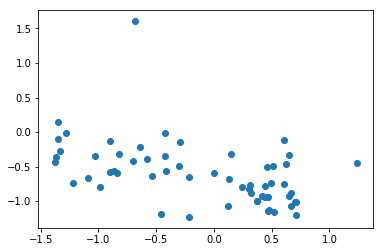

In [47]:
plt.scatter(X_t0['Min_Rate_Slurry (bpm)'],X_t0['GasCum360'])

In [48]:
X_t0_a=X_t0[X_t0['Min_Rate_Slurry (bpm)']< -0.1]
X_t0_b=X_t0[X_t0['Min_Rate_Slurry (bpm)']>= -0.1]
len(X_t0_a),len(X_t0_b)

(28, 31)

In [49]:
#Let's delete an extreme value 
o=X_t0['GasCum360'].argmax()
X_t0_a=X_t0_a.drop(o)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     10.22
Date:                Fri, 09 Mar 2018   Prob (F-statistic):            0.00374
Time:                        17:20:10   Log-Likelihood:                -2.6568
No. Observations:                  27   AIC:                             9.314
Df Residuals:                      25   BIC:                             11.91
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4476      0.053     -8.382      0.0

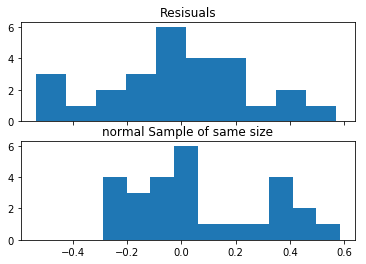

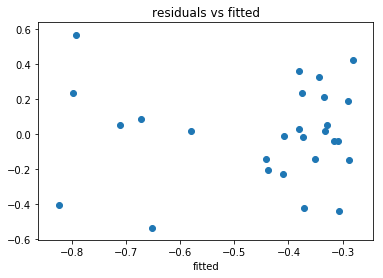

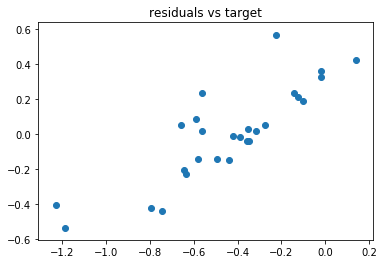

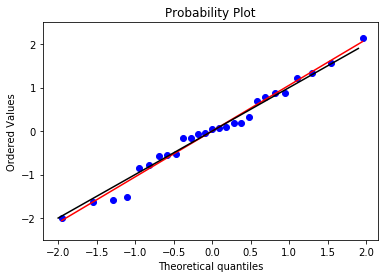

In [50]:
model(X_t0_a)

**Conclusion** : The model seems to be good

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     9.859
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           0.000146
Time:                        17:20:10   Log-Likelihood:                 7.6723
No. Observations:                  31   AIC:                            -7.345
Df Residuals:                      27   BIC:                            -1.609
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8049      0.036    -22.138      0.0

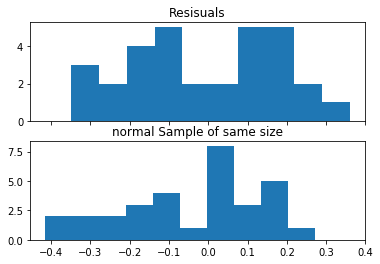

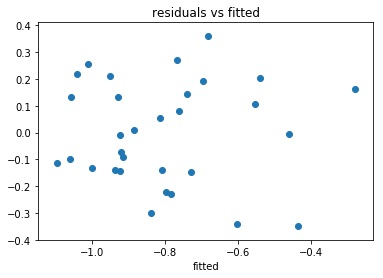

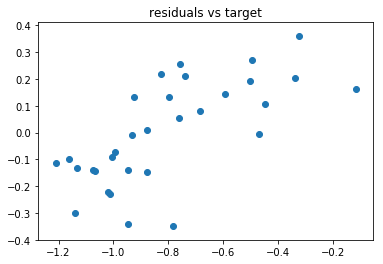

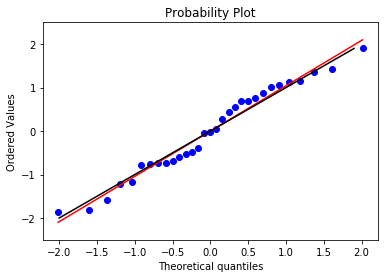

In [51]:
model(X_t0_b)

**Conclusion **: The model seems to be good

## PARTITION 1 OF GROUP1

In [52]:
print("------------------ON TRAINING SET-----------------------------")
print("Mean squared error for partition 1: %.2f"% mean_squared_error(y_train1, lmG1_1.predict(X_train1)))
print('Variance score for partition 1: %.2f'% r2_score(y_train1, lmG1_1.predict(X_train1)))

------------------ON TRAINING SET-----------------------------
Mean squared error for partition 1: 0.03
Variance score for partition 1: 0.87


In [53]:
print("------------------ON TEST SET-----------------------------")
print("Mean squared error for partition 1: %.2f"% mean_squared_error(y_test1, y_pred1))
print('Variance score for partition 1: %.2f'% r2_score(y_test1, y_pred1))

------------------ON TEST SET-----------------------------
Mean squared error for partition 1: 0.07
Variance score for partition 1: 0.47


We see that the model is doing good let's do an analysis on Residuals and see if there is sthg to imrove

In [54]:
X_train1['GasCum360']=y_train1

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.427
Model:                            OLS   Adj. R-squared:                  0.405
Method:                 Least Squares   F-statistic:                     19.15
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           2.25e-09
Time:                        17:39:13   Log-Likelihood:                -30.782
No. Observations:                  81   AIC:                             69.56
Df Residuals:                      77   BIC:                             79.14
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4632      0.040    -11.488      0.0

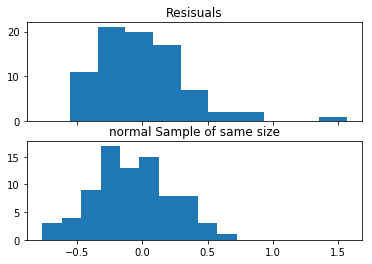

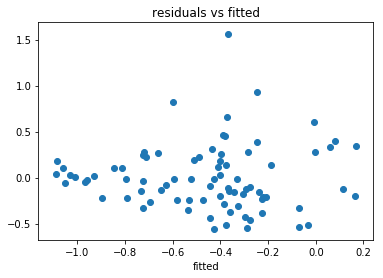

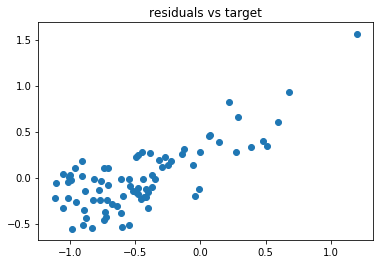

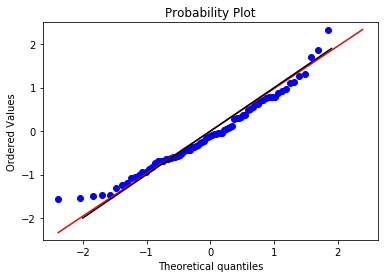

In [56]:
model(X_train1)

the residuals vs fitted plot shows some pattern (nonconstant variance so we will do a splitting to see if we get any improvement

In [57]:
z1=find_split(X_train1,step=5)
cand1=z1.head(10)['feat'].values # 10 best candifates


target variance: 0.21862574280609112
--------------------------------


In [58]:
z1.head(5)

,feat,mse,breakpoint,threshold
16,Temperature (F),0.062161,65,0.273260
4,Pressure_PPLS (PSI),0.062796,50,-0.418414
14,DT_PPLS (us/ft),0.062933,15,-0.544835
15,DTs_PPLS (us/ft),0.066767,10,-0.004015
6,Vcarb_PPLS,0.068556,40,-0.388849


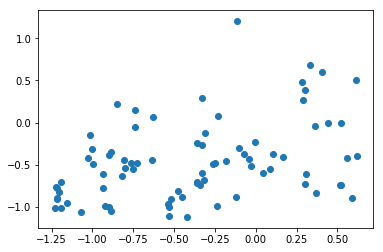

In [59]:
plt.scatter(X_train1['Temperature (F)'],X_train1['GasCum360'])

We split by "Temperature (F)"

In [60]:
X_train1a=X_train1[X_train1['Temperature (F)']< -0.375]
X_train1b=X_train1[X_train1['Temperature (F)']>= -0.375]

Let's check if there is improvements:

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     16.75
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           6.46e-07
Time:                        18:26:58   Log-Likelihood:                 2.2421
No. Observations:                  39   AIC:                             3.516
Df Residuals:                      35   BIC:                             10.17
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6526      0.039    -16.901      0.0

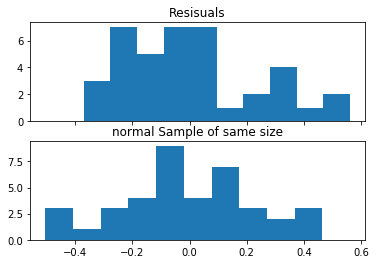

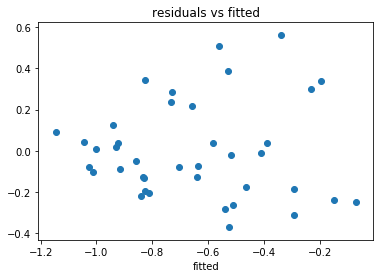

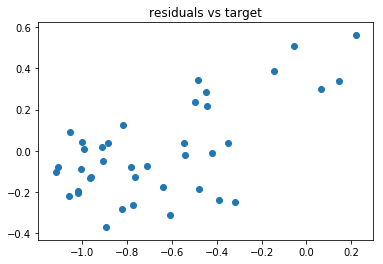

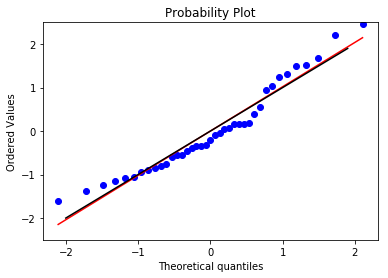

In [61]:
model(X_train1a) #Model ok

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.410
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     13.53
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           3.43e-05
Time:                        18:29:15   Log-Likelihood:                -18.500
No. Observations:                  42   AIC:                             43.00
Df Residuals:                      39   BIC:                             48.21
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2874      0.060     -4.775      0.0

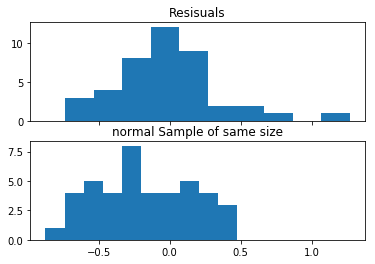

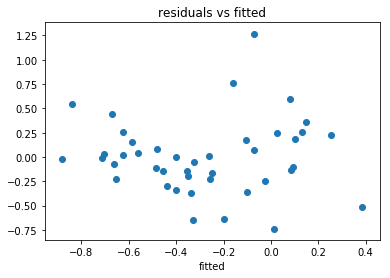

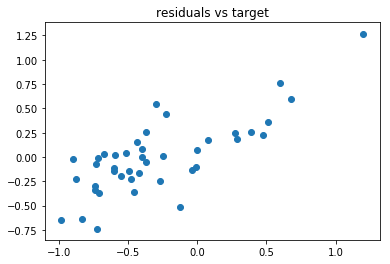

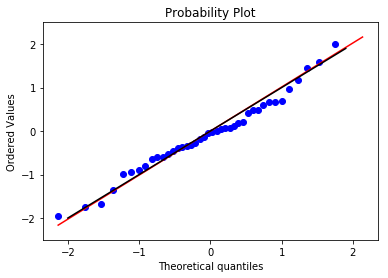

In [62]:
model(X_train1b) #Non linearity 

As the plot residuals vs fitted shows, a non linear pattern appears in the plot, **let's try a splitting**

In [63]:
z1b=find_split(X_train1b,step=5)
cand1=z1b.head(10)['feat'].values # 10 best candifates


target variance: 0.2393620015198993
--------------------------------


In [64]:
z1b.head(5)

,feat,mse,breakpoint,threshold
35,ISIP (KPa),0.075347,15,-0.004015
20,Heat_Flow (W/m2),0.087513,15,0.273260
23,Frac_Gradient (PSI/ft),0.087547,10,0.596244
10,YM_PPLS (PSI),0.091016,10,1.199378
17,Temp_Anomaly (F),0.094903,10,-0.677026


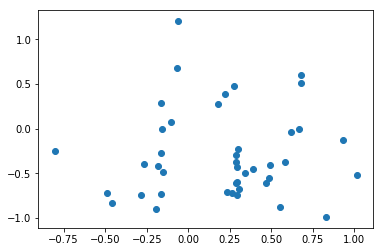

In [70]:
plt.scatter(X_train1b['Heat_Flow (W/m2)'],X_train1b['GasCum360'])

We split by "Heat_Flow (W/m2)"

In [71]:
X_train1ba=X_train1b[X_train1b['Heat_Flow (W/m2)']< 0]
X_train1bb=X_train1b[X_train1b['Heat_Flow (W/m2)']>= 0]

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.451
Method:                 Least Squares   F-statistic:                     12.50
Date:                Fri, 09 Mar 2018   Prob (F-statistic):            0.00365
Time:                        18:55:30   Log-Likelihood:                -7.9512
No. Observations:                  15   AIC:                             19.90
Df Residuals:                      13   BIC:                             21.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2336      0.114     -2.048      0.0

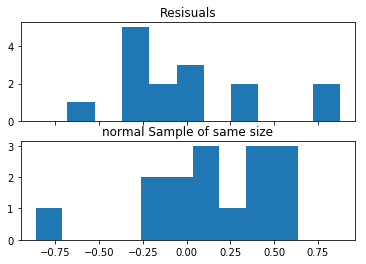

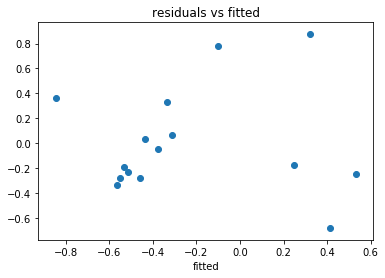

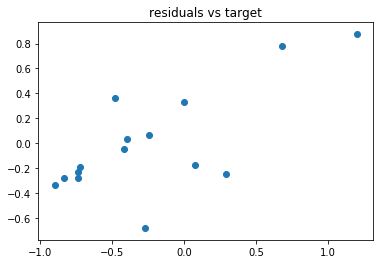

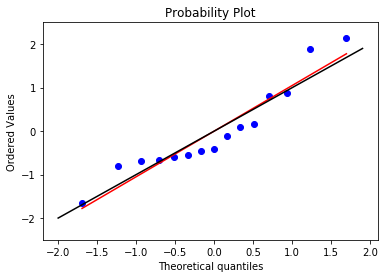

In [73]:
model(X_train1ba)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     18.68
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           8.02e-07
Time:                        18:54:40   Log-Likelihood:                 4.4113
No. Observations:                  27   AIC:                             1.177
Df Residuals:                      22   BIC:                             7.657
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3173      0.044     -7.242      0.0

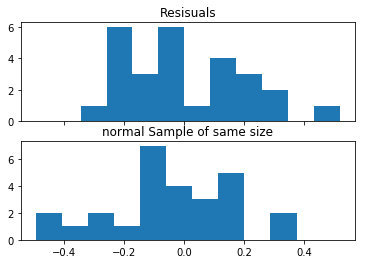

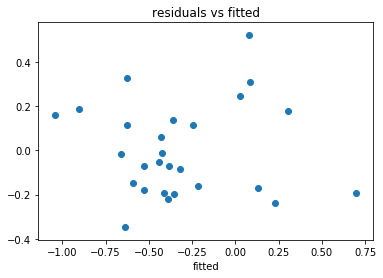

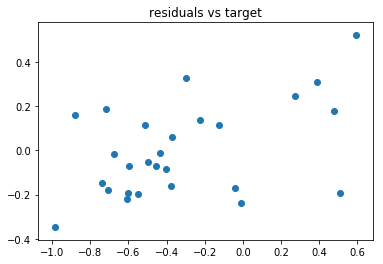

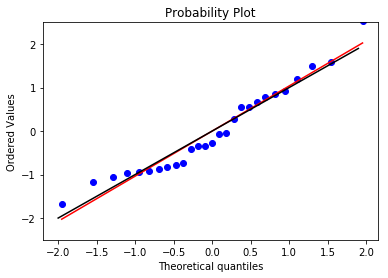

In [72]:
model(X_train1bb)

## PARTITION 2 OF GROUP1

In [75]:
print("------------------ON TRAINING SET-----------------------------")
print("Mean squared error for partition 1: %.2f"% mean_squared_error(y_train2, lmG1_2.predict(X_train2)))
print('Variance score for partition 1: %.2f'% r2_score(y_train2, lmG1_2.predict(X_train2)))

------------------ON TRAINING SET-----------------------------
Mean squared error for partition 1: 0.11
Variance score for partition 1: 0.87


In [74]:
print("------------------ON TEST SET-----------------------------")
print("Mean squared error for partition 1: %.2f"% mean_squared_error(y_test2, y_pred2))
print('Variance score for partition 1: %.2f'% r2_score(y_test2, y_pred2))

------------------ON TEST SET-----------------------------
Mean squared error for partition 1: 0.38
Variance score for partition 1: 0.53


Let's analyse the residuals and see any imrovement on the model

In [76]:
X_train2['GasCum360']=y_train2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     39.87
Date:                Fri, 09 Mar 2018   Prob (F-statistic):           7.16e-23
Time:                        19:07:45   Log-Likelihood:                -92.032
No. Observations:                 112   AIC:                             196.1
Df Residuals:                     106   BIC:                             212.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5725      0.053     10.711      0.0

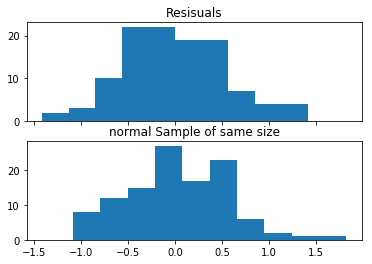

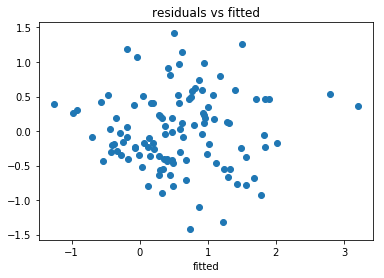

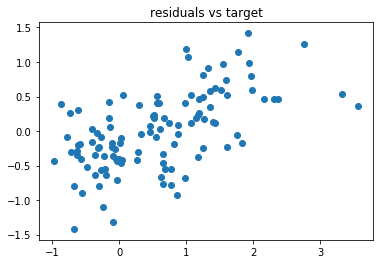

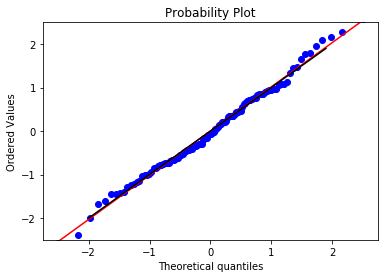

In [77]:
model(X_train2)